 #  A Whale off the Port(folio)
 ---
### Matthew Newkirk 
#### UW FinTech Bootcamp Part-Time Dec. 2020 
#### Unit 3 Homework - Pandas

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [151]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
from matplotlib import cm

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [152]:
# Reading whale returns
whale_returns = pd.read_csv("resources/whale_returns.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)

In [153]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [154]:
# Drop nulls
whale_returns.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [155]:
# Reading algorithmic returns
algo_returns = pd.read_csv("resources/algo_returns.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)

In [156]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [157]:
# Drop nulls
algo_returns.dropna(inplace=True)


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [158]:
# Reading S&P 500 Closing Prices
sp_close = pd.read_csv("resources/sp500_history.csv", parse_dates=True, infer_datetime_format=True)

In [159]:
# Check Data Types
sp_close.dtypes

Date     object
Close    object
dtype: object

In [160]:
# Fix Data Types
sp_close["Close"] = sp_close["Close"].str.replace("$", "")
sp_close['Close'] = sp_close['Close'].astype(float)
sp_close["Date"] = pd.to_datetime(sp_close["Date"])

sp_close

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06
...,...,...
1644,2012-10-05,1460.93
1645,2012-10-04,1461.40
1646,2012-10-03,1450.99
1647,2012-10-02,1445.75


In [161]:
# Drop nulls
sp_close.dropna(inplace=True)

In [162]:
sp_close = sp_close.set_index(sp_close["Date"])
sp_close = sp_close.drop(sp_close.columns[0], axis=1)
sp_close.sort_index(inplace = True)
sp_close

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [163]:
# Rename `Close` Column to be specific to this portfolio.
sp_close = sp_close.rename(columns={
    "Close": "S&P"})
sp_close

,S&P
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [164]:
# Calculate Daily Returns
sp_returns = sp_close.pct_change()
sp_returns = sp_returns.dropna()
sp_returns

,S&P
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [165]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combo_returns = pd.concat([whale_returns, algo_returns, sp_returns], axis='columns',join='inner')
combo_returns = combo_returns.dropna()
combo_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

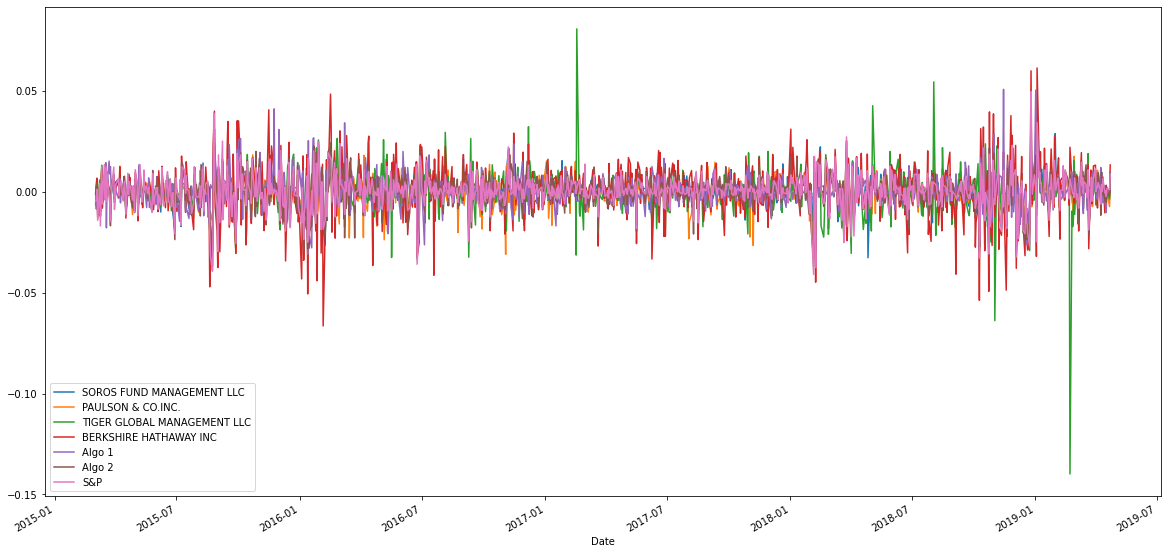

In [166]:
# Plot daily returns of all portfolios
combo_returns.plot(figsize = (20, 10))

#### Calculate and Plot cumulative returns.

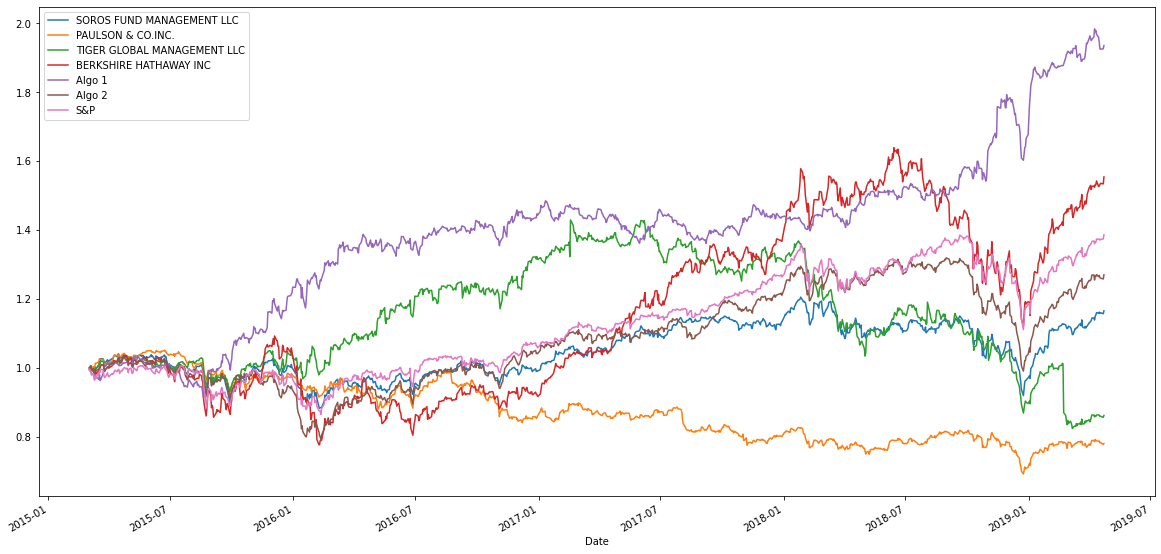

In [167]:
# Calculate cumulative returns of all portfolios
combo_sum = (1 + combo_returns).cumprod()
# Plot cumulative returns
combo_sum.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


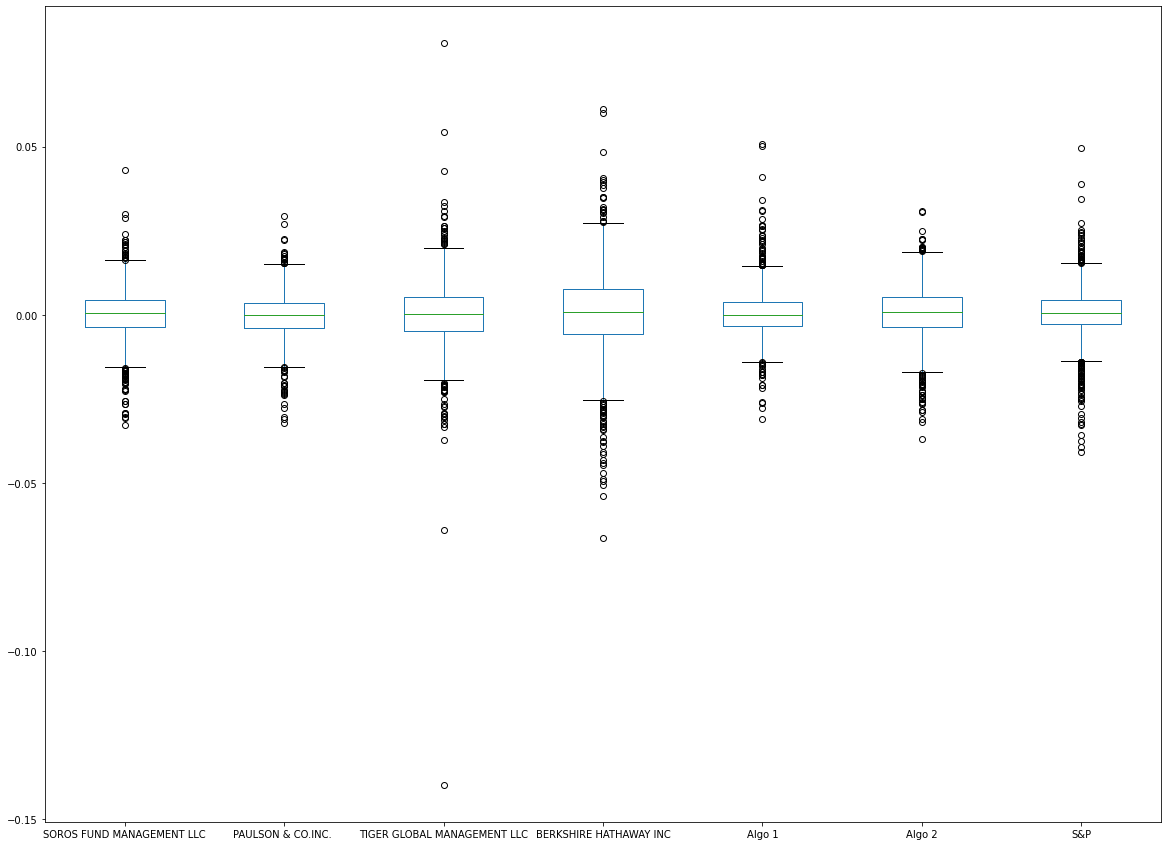

In [168]:
# Box plot to visually show risk
combo_returns.plot.box(figsize=(20,15))

### Calculate Standard Deviations

In [169]:
# Calculate the daily standard deviations of all portfolios
combo_std = combo_returns.std()
combo_std.sort_values(inplace=True)
combo_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P                            0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [170]:
# Calculate  the daily standard deviation of S&P 500
sp_std = combo_returns['S&P'].std()
risky_portfolios = []
#Determine which portfolios are riskier than the S&P 500
for portfolio in combo_std.keys():
    if combo_std[portfolio] > sp_std:
        print(portfolio +" " + str(combo_std[portfolio]))
        risky_portfolios.append(portfolio)

TIGER GLOBAL MANAGEMENT LLC 0.010893969618743032
BERKSHIRE HATHAWAY INC 0.012918618441883524


### Calculate the Annualized Standard Deviation

In [171]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combo_std * np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std
#sp_std['SP']

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P                            0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

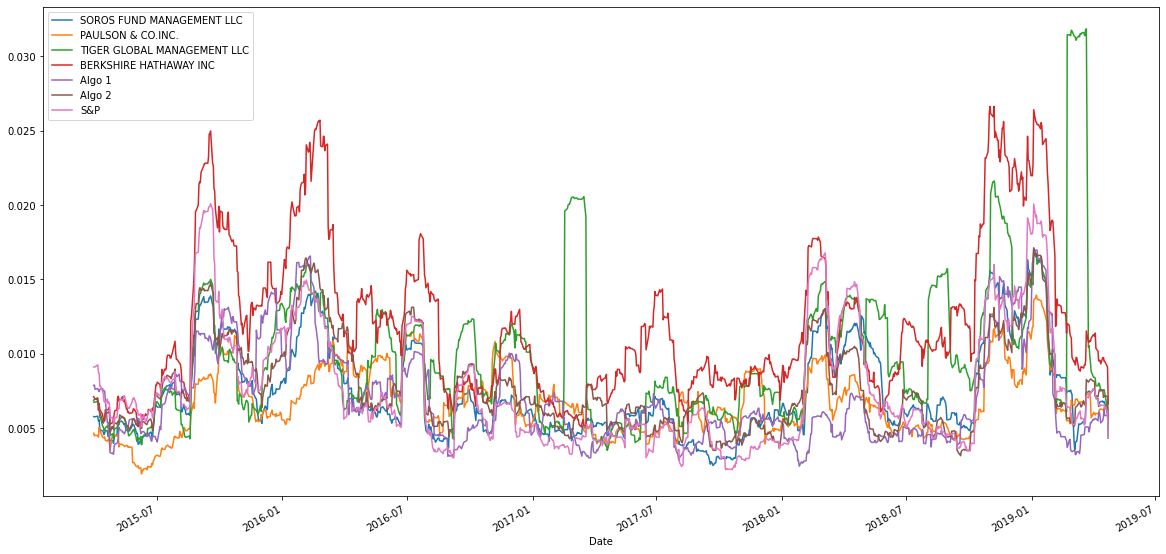

In [172]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combo_returns.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation

### Calculate and plot the correlation

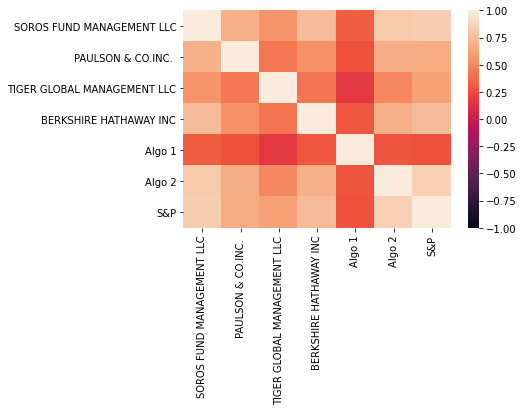

In [173]:
# Calculate the correlation
correlation = combo_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

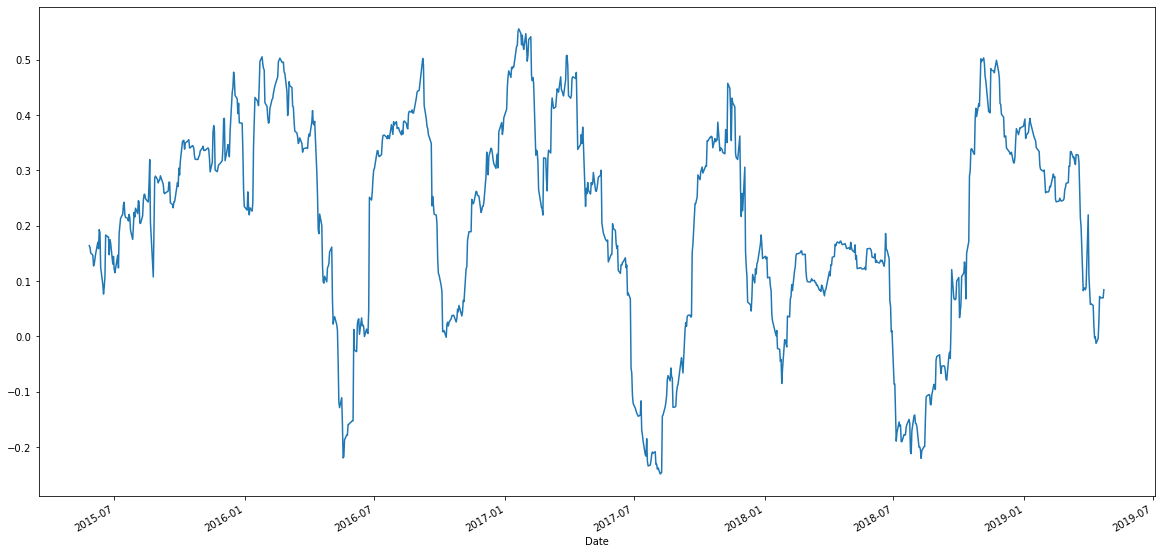

In [174]:
# Calculate covariance of a single portfolio
algo1_covariance = combo_returns['Algo 1'].cov(combo_returns['S&P'])
# Calculate variance of S&P 500
variance = combo_returns['S&P'].var()
# Computing beta
algo1_beta = algo1_covariance / variance
#print(algo1_beta)

# Plot beta trend
rolling_algo1_covariance = combo_returns['Algo 1'].rolling(window=60).cov(combo_returns['S&P'])
rolling_variance = combo_returns['S&P'].rolling(window=60).var()
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
rolling_algo1_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [175]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [176]:
# Annualized Sharpe Ratios
safe_rate = 0
sharpe_ratios = ((combo_returns.mean() * 252) - safe_rate) / (combo_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(inplace=True)
#print((combo_returns.mean() * 252))
sharpe_ratios

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P                            0.648267
Algo 1                         1.378648
dtype: float64

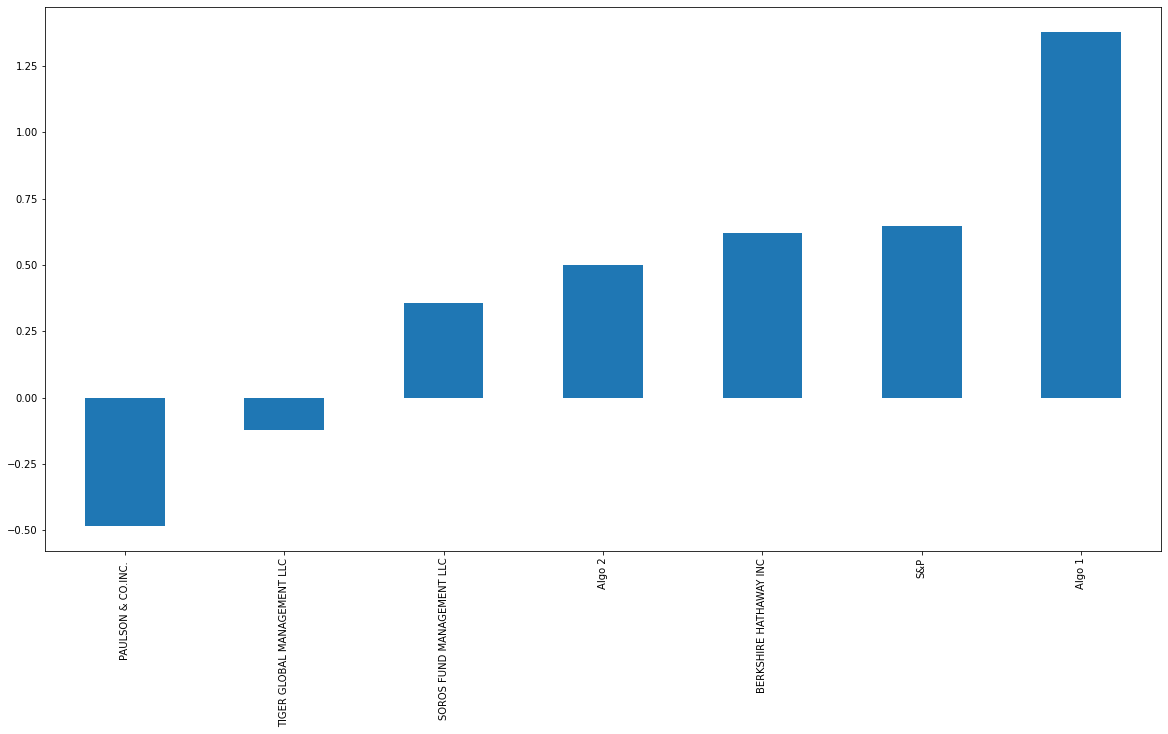

In [177]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Clearly the first algorithmic portfolio, Algo1 is far and away the winner over both the other algorithmic portfolio as well as the whales and the S&P 500. Looking at just the graph of the cumulative product we can see Algo1 outperform all other portfolios. The only other porfolio to beat the S&P 500 over the same period is Berkshire Hathaway. A quick run through of our various methods of statical analysis reveals why this is so. Firstly, Algo1 has the second lowest standard deviation, indicating relative low volatility. Algo1 is least correalated with the other portfolios and the market, meaning its outcome is the least tethered to market trends. This is reinforced by its persistant Beta of less than 1 which indicates that it tends to be less volatile than the market. Finally, upon calculating the Sharpe ratio for all portfolios Algo1 comes out on top again as it has the best rate of return versus its risk among the whole group.

Algo2 is fairly mediocre by comparison. Though it fares better than a couple whale portfolios, it fails to beat the market's cumulative returns given the same time period.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.



In [178]:
# Reading data from 1st stock: Nintendo!
ntdoy_data = pd.read_csv("resources/ntdoy.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
ntdoy_data.index = pd.to_datetime(ntdoy_data.index).date
ntdoy_data

,Close
2012-10-12,16.36
2012-10-15,16.64
2012-10-16,16.99
2012-10-17,16.70
2012-10-18,16.66
...,...
2019-12-23,49.64
2019-12-24,49.55
2019-12-26,49.90
2019-12-27,50.00


In [179]:
# Reading data from 2nd stock: Avid!
avid_data = pd.read_csv("resources/avid.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
avid_data.index = pd.to_datetime(avid_data.index).date
avid_data

,Close
2012-10-12,8.87
2012-10-15,8.88
2012-10-16,8.86
2012-10-17,8.82
2012-10-18,8.55
...,...
2019-12-23,8.36
2019-12-24,8.36
2019-12-26,8.41
2019-12-27,8.29


In [180]:
# Reading data from 3rd stock: Take Two Interactive!
ttwo_data = pd.read_csv("resources/ttwo.csv",index_col='Date', parse_dates=True, infer_datetime_format=True)
ttwo_data.index = pd.to_datetime(ttwo_data.index).date
ttwo_data

,Close
2012-10-12,11.18
2012-10-15,11.50
2012-10-16,11.50
2012-10-17,11.46
2012-10-18,11.45
...,...
2019-12-23,122.12
2019-12-24,123.93
2019-12-26,123.99
2019-12-27,124.47


In [181]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([ntdoy_data,avid_data,ttwo_data], axis='columns',join='inner')


In [182]:
# Reset Date index
my_portfolio.sort_index(inplace = True)
my_portfolio

,Close,Close,Close
2012-10-12,16.36,8.87,11.18
2012-10-15,16.64,8.88,11.50
2012-10-16,16.99,8.86,11.50
2012-10-17,16.70,8.82,11.46
2012-10-18,16.66,8.55,11.45
...,...,...,...
2019-12-23,49.64,8.36,122.12
2019-12-24,49.55,8.36,123.93
2019-12-26,49.90,8.41,123.99
2019-12-27,50.00,8.29,124.47


In [183]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns = ['NTDOY','AVID','TTWO']
my_portfolio

,NTDOY,AVID,TTWO
2012-10-12,16.36,8.87,11.18
2012-10-15,16.64,8.88,11.50
2012-10-16,16.99,8.86,11.50
2012-10-17,16.70,8.82,11.46
2012-10-18,16.66,8.55,11.45
...,...,...,...
2019-12-23,49.64,8.36,122.12
2019-12-24,49.55,8.36,123.93
2019-12-26,49.90,8.41,123.99
2019-12-27,50.00,8.29,124.47


In [184]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change()

# Drop NAs
my_portfolio_returns.dropna(inplace=True)

# Display sample data
my_portfolio_returns

,NTDOY,AVID,TTWO
2012-10-15,0.017115,0.001127,0.028623
2012-10-16,0.021034,-0.002252,0.000000
2012-10-17,-0.017069,-0.004515,-0.003478
2012-10-18,-0.002395,-0.030612,-0.000873
2012-10-19,-0.037215,-0.044444,-0.041048
...,...,...,...
2019-12-23,0.003234,0.004808,-0.012054
2019-12-24,-0.001813,0.000000,0.014821
2019-12-26,0.007064,0.005981,0.000484
2019-12-27,0.002004,-0.014269,0.003871


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [185]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_weighted_returns = my_portfolio_returns.dot(weights) #ALA Matrix Algebra
# Display sample data
#my_weighted_returns.columns = ["Date","Me"]
my_weighted_returns=my_weighted_returns.rename("Me")
my_weighted_returns=my_weighted_returns.dropna()
my_weighted_returns

2012-10-15    0.015622
2012-10-16    0.006260
2012-10-17   -0.008354
2012-10-18   -0.011293
2012-10-19   -0.040902
                ...   
2019-12-23   -0.001338
2019-12-24    0.004336
2019-12-26    0.004510
2019-12-27   -0.002798
2019-12-30   -0.003656
Name: Me, Length: 1813, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [186]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([combo_returns, my_weighted_returns], axis='columns',join='inner')

In [187]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
#combo_returns = combo_returns.drop(columns='')
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,Me
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.012802
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.001284
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.022392
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.002829
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.009801
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.001377
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.011626
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.027363
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.003361


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [188]:
# Calculate the annualized `std`
all_std = all_returns.std()
all_annual_std = all_std * np.sqrt(252)
all_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P                            0.135786
Me                             0.300905
dtype: float64

### Calculate and plot rolling `std` with 21-day window

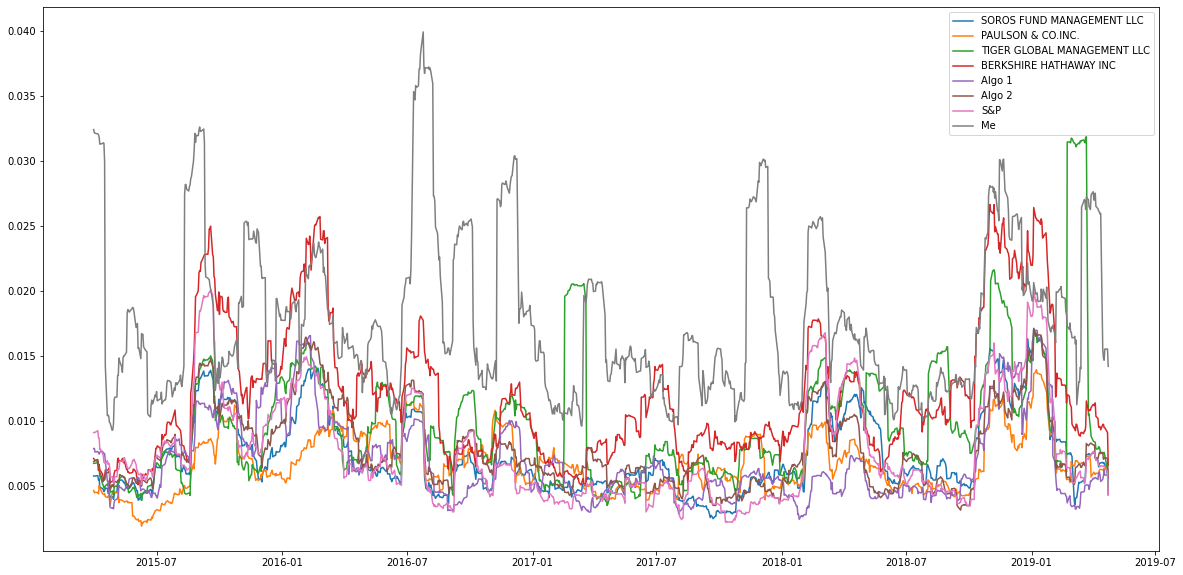

In [189]:
# Calculate rolling standard deviation
all_rolling_std = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

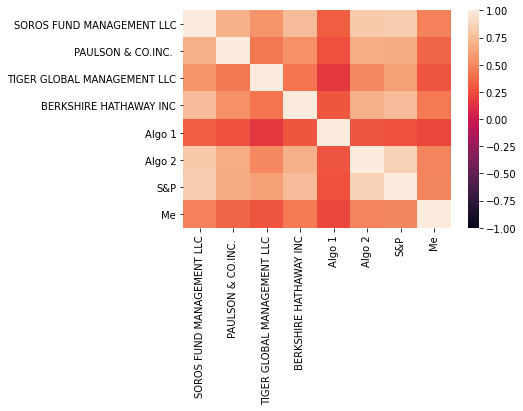

In [190]:
# Calculate and plot the correlation
# Calculate the correlation
all_correlation = all_returns.corr()
# Display de correlation matrix
sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

1.0987794155385644


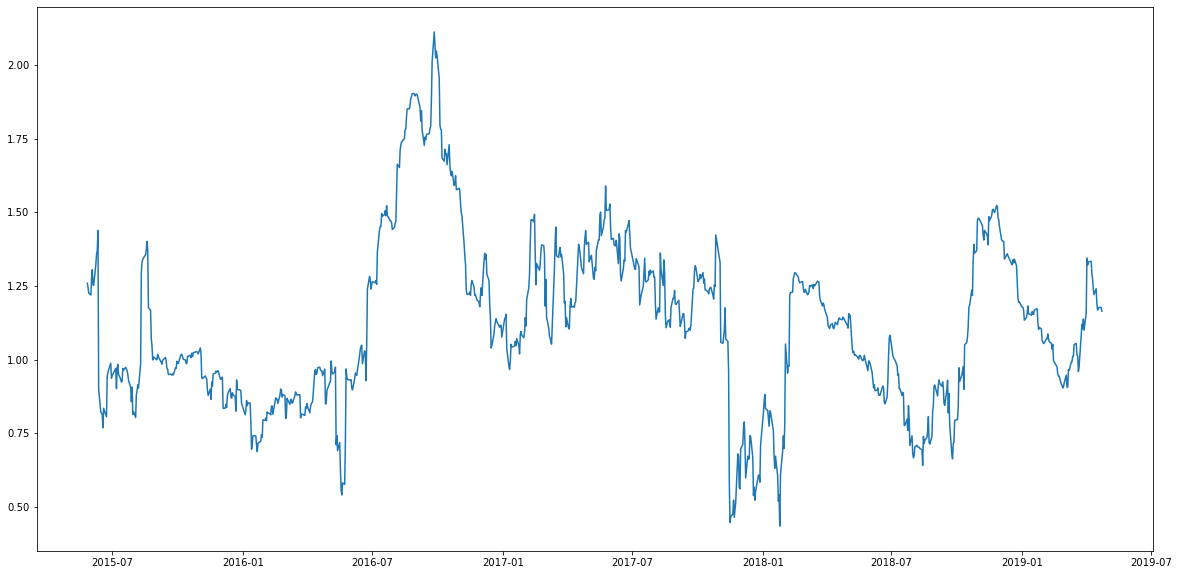

In [191]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
my_covariance = all_returns['Me'].cov(all_returns['S&P'])
# Calculate variance of S&P 500
all_variance = all_returns['S&P'].var()
# Computing beta
my_beta = my_covariance / variance
print(my_beta)

# Plot beta trend
rolling_my_covariance = all_returns['Me'].rolling(window=60).cov(all_returns['S&P'])
rolling_variance = all_returns['S&P'].rolling(window=60).var()
rolling_my_beta = rolling_my_covariance / rolling_variance
rolling_my_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [192]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratios = ((all_returns.mean() * 252) - safe_rate) / (all_returns.std() * np.sqrt(252))
#sharpe_ratios

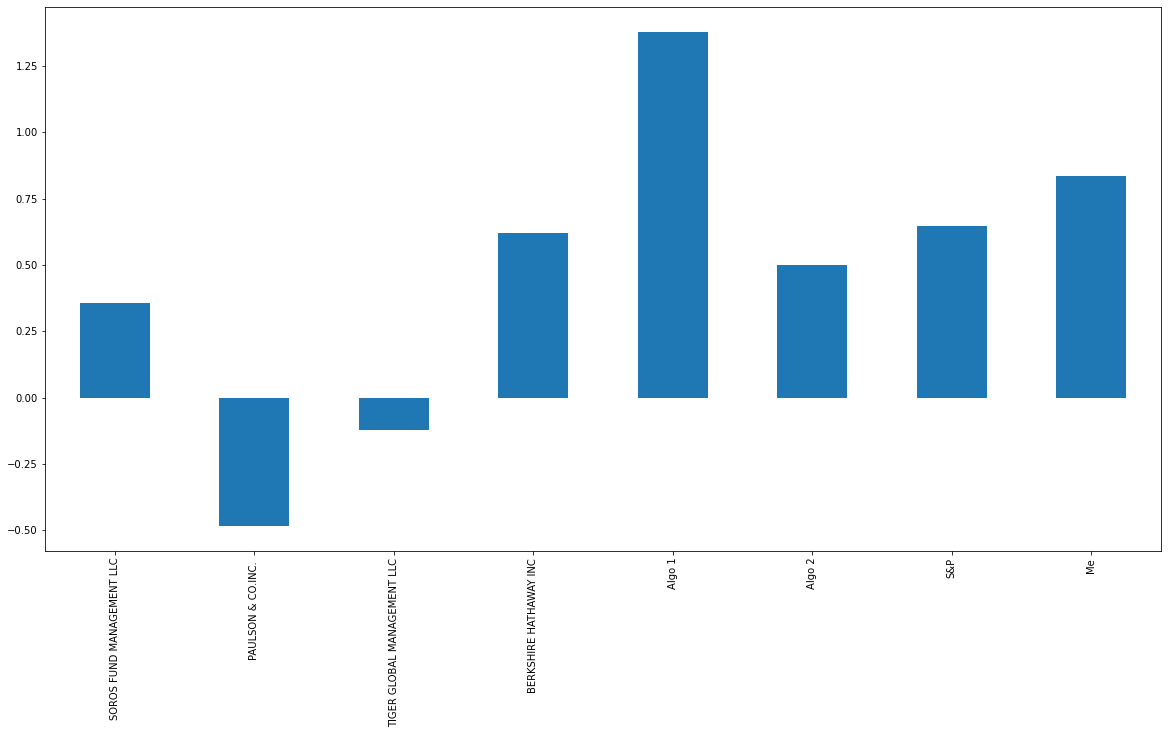

In [193]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind='bar',figsize=(20,10))

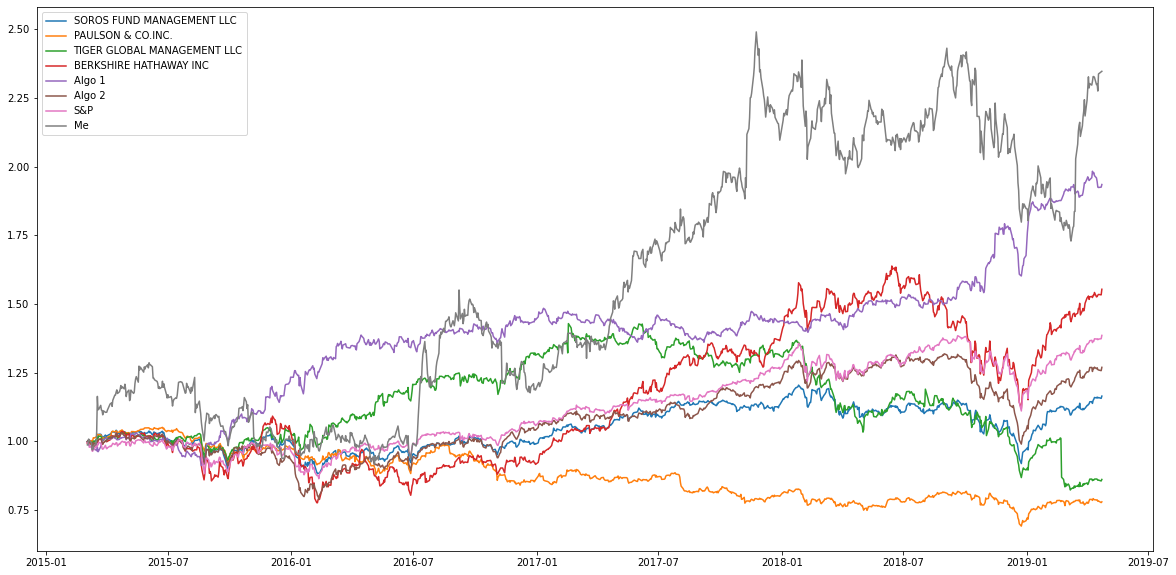

In [194]:
#Bonus CumProd plot to help analysis.
all_sum = (1 + all_returns).cumprod()
all_sum.plot(figsize=(20,10))

### How does your portfolio do?

Based off cumulative returns alone, my portfolio outperforms the nearest competitor Algo1 by about %30. It is mostly uncorrelated with the market and the other portfolios, though not as uncorrelated as Algo1. According to standard deviation, my portfolio is the riskiest option of all portfolios. After using the Sharpe ratio formula to factor in returns per risk, Algo1 is still dominant, but my portfolio at least comes in second despite its volatility. I'd probably invest in Algo1 over my portfolio, as for the long term I'd rather have lower volatility despite my portfolio's strong positive returns performance over this period of sample data.


In [195]:
#End Matthew Newkirk HW#3.